Пахалович Д.О 
LAB_6


TensorFlow version: 2.20.0

=== РОЗДІЛ 1: Операції з тензорами ===

--- 1.1. Створення тензорів ---
Скаляр: 42
Вектор: [10.5 20.  30.5]
Матриця:
[[1 2]
 [3 4]
 [5 6]]
Тензор:
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

--- 1.2. Характеристики тензорів ---
[Скаляр] Shape: (), Rank (ndim): 0, Size: 1
[Вектор] Shape: (3,), Rank (ndim): 1, Size: 3
[Матриця] Shape: (3, 2), Rank (ndim): 2, Size: 6
[Тензор] Shape: (2, 2, 2), Rank (ndim): 3, Size: 8

--- 1.3. Випадкові тензори [5, 300] ---
Tensor A shape: (5, 300)
Tensor B shape: (5, 300)

--- 1.4. Множення матриць (tf.matmul) ---
Результат множення: (5, 5)

--- 1.5. Скалярний добуток (tf.tensordot) ---
Результат скалярного добутку: (5, 5)

--- 1.6. Тензор зображення [224, 224, 3] ---
Image Tensor: (224, 224, 3)

--- 1.7. Min/Max значення ---
Min: 2.0742416381835938e-05, Max: 0.999990701675415

--- 1.8. Стиснення (Squeeze) ---
До стиснення: (1, 224, 224, 3)
Після стиснення: (224, 224, 3)

--- 1.9. Індекс максимуму (Argmax) ---
Тензор: [ 5 12  1 99  4

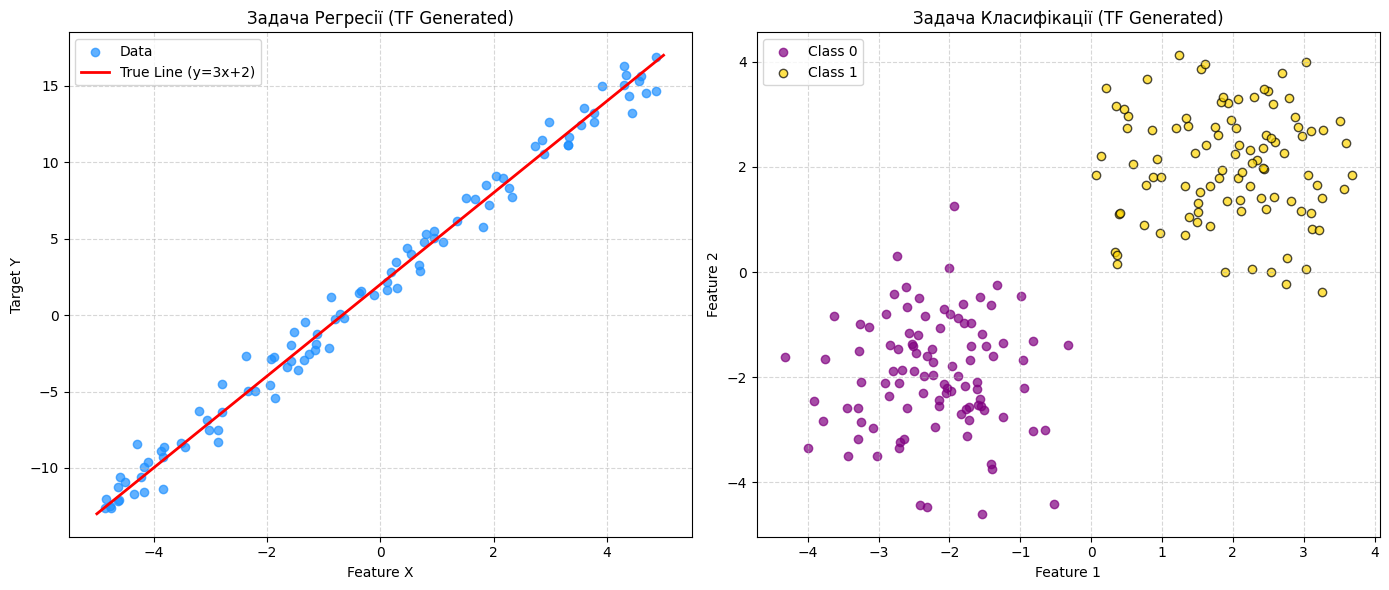

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

# 1. Здійснити загальні операції з використанням TensorFlow
print("\n=== РОЗДІЛ 1: Операції з тензорами ===")

# --- 1.1. Створіть вектор, скаляр, матрицю та тензор ---
print("\n--- 1.1. Створення тензорів ---")
scalar_1_1 = tf.constant(42)  # Скаляр (rank 0)
vector_1_1 = tf.constant([10.5, 20.0, 30.5])  # Вектор (rank 1)
matrix_1_1 = tf.constant([[1, 2], [3, 4], [5, 6]])  # Матриця (rank 2)
tensor_1_1 = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # Тензор (rank 3)

print(f"Скаляр: {scalar_1_1}")
print(f"Вектор: {vector_1_1}")
print(f"Матриця:\n{matrix_1_1}")
print(f"Тензор:\n{tensor_1_1}")


# --- 1.2. Знайдіть форму, ранг та розмір тензорів ---
print("\n--- 1.2. Характеристики тензорів ---")
def describe_tensor(name, t):
    print(f"[{name}] Shape: {t.shape}, Rank (ndim): {t.ndim}, Size: {tf.size(t)}")

describe_tensor("Скаляр", scalar_1_1)
describe_tensor("Вектор", vector_1_1)
describe_tensor("Матриця", matrix_1_1)
describe_tensor("Тензор", tensor_1_1)


# --- 1.3. Створіть два тензори [5, 300] (випадкові 0-1) ---
print("\n--- 1.3. Випадкові тензори [5, 300] ---")
tensor_A = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
tensor_B = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
print(f"Tensor A shape: {tensor_A.shape}")
print(f"Tensor B shape: {tensor_B.shape}")


# --- 1.4. Помножте тензори (множення матриць) ---
print("\n--- 1.4. Множення матриць (tf.matmul) ---")
# Примітка: [5, 300] * [5, 300] неможливо.
# Транспонуємо другий тензор: [5, 300] * [300, 5] -> Результат [5, 5]
matrix_mult_result = tf.matmul(tensor_A, tf.transpose(tensor_B))
print(f"Результат множення: {matrix_mult_result.shape}")


# --- 1.5. Помножте тензори (скалярний добуток) ---
print("\n--- 1.5. Скалярний добуток (tf.tensordot) ---")
# Використовуємо tensordot з axes=1 (аналог матричного множення для 2D)
# Також потребує узгодження розмірностей (рядки на стовпці)
dot_product_result = tf.tensordot(tensor_A, tf.transpose(tensor_B), axes=1)
print(f"Результат скалярного добутку: {dot_product_result.shape}")


# --- 1.6. Створіть тензор [224, 224, 3] ---
print("\n--- 1.6. Тензор зображення [224, 224, 3] ---")
image_tensor = tf.random.uniform(shape=[224, 224, 3], minval=0, maxval=1)
print(f"Image Tensor: {image_tensor.shape}")


# --- 1.7. Знайдіть мінімальне та максимальне значення ---
print("\n--- 1.7. Min/Max значення ---")
min_val = tf.reduce_min(image_tensor)
max_val = tf.reduce_max(image_tensor)
print(f"Min: {min_val.numpy()}, Max: {max_val.numpy()}")


# --- 1.8. Стисніть тензор (Squeeze) ---
print("\n--- 1.8. Стиснення (Squeeze) ---")
# Створення
tensor_batch = tf.random.uniform(shape=[1, 224, 224, 3], minval=0, maxval=1)
print(f"До стиснення: {tensor_batch.shape}")
# Стиснення
tensor_squeezed = tf.squeeze(tensor_batch)
print(f"Після стиснення: {tensor_squeezed.shape}")


# --- 1.9. Знайдіть індекс максимального значення ---
print("\n--- 1.9. Індекс максимуму (Argmax) ---")
# Створюємо власний тензор форми [10]
my_tensor_10 = tf.constant([5, 12, 1, 99, 4, 3, 0, 55, 21, 8])
max_index = tf.argmax(my_tensor_10)

print(f"Тензор: {my_tensor_10.numpy()}")
print(f"Максимальне значення (для перевірки): {tf.reduce_max(my_tensor_10)}")
print(f"Індекс максимального значення: {max_index.numpy()}")


# --- 1.10. One-hot кодування ---
print("\n--- 1.10. One-hot кодування ---")
# Кодуємо індекс, який знайшли в 1.9
one_hot_encoded = tf.one_hot(max_index, depth=10)
print(f"Закодований тензор:\n{one_hot_encoded.numpy()}")


# 2. Перевірте доступ до графічного процесора
print("\n=== РОЗДІЛ 2: Перевірка GPU ===")
gpu_list = tf.config.list_physical_devices('GPU')
if gpu_list:
    print(f"GPU знайдено: {gpu_list}")
else:
    print("GPU не знайдено (використовується CPU).")


# 3. Згенерувати набір даних для регресії та класифікації
print("\n=== РОЗДІЛ 3: Генерація даних ===")

# --- А) Дані для Регресії ---
# y = 3x + 2 + шум
N_samples = 100
X_reg = tf.random.uniform(shape=[N_samples], minval=-5, maxval=5)
noise_reg = tf.random.normal(shape=[N_samples], stddev=1.0)
y_reg = 3 * X_reg + 2 + noise_reg

# --- Б) Дані для Класифікації ---
# Дві хмари точок
# Клас 0 (центр -2, -2)
class0_x = tf.random.normal(shape=[N_samples], mean=-2, stddev=1)
class0_y = tf.random.normal(shape=[N_samples], mean=-2, stddev=1)
# Клас 1 (центр 2, 2)
class1_x = tf.random.normal(shape=[N_samples], mean=2, stddev=1)
class1_y = tf.random.normal(shape=[N_samples], mean=2, stddev=1)


# 4. Здійснити графічний аналіз (Matplotlib)
print("\n=== РОЗДІЛ 4: Графічний аналіз ===")

plt.figure(figsize=(14, 6))

# Графік 1: Регресія
plt.subplot(1, 2, 1)
plt.scatter(X_reg, y_reg, color='dodgerblue', alpha=0.7, label='Data')
# Малюємо ідеальну лінію для порівняння
plt.plot([-5, 5], [-5*3+2, 5*3+2], color='red', linewidth=2, label='True Line (y=3x+2)')
plt.title('Задача Регресії (TF Generated)')
plt.xlabel('Feature X')
plt.ylabel('Target Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Графік 2: Класифікація
plt.subplot(1, 2, 2)
plt.scatter(class0_x, class0_y, c='purple', label='Class 0', alpha=0.7)
plt.scatter(class1_x, class1_y, c='gold', label='Class 1', alpha=0.7, edgecolors='black')
plt.title('Задача Класифікації (TF Generated)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()